In [17]:
import mglearn
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline 

## K-Nearest-Neighbors Classification 

### Strengths, Weaknesses, and Parameters:
#### 1. The two important parameters to KNeighbors Classifier
<ul>
<li>The number of neighbors
<li>The distance between between data points 
</ul>

#### 2. In practice, n_neighbors 3 or 5 works well but you should adjust this parameter 
#### 3. Strength: very easy to understand, often give reasonable performance without lot of adjustments 
#### 4. Weaknesses: the prediction can be slow when the training dataset is very large. It's important to preprocess your data. This process doesn't work well with hundreds or more features. Also perform badly where most features are "0" (so-called sparse datasets)

/home/paul-romeo/.local/lib/python3.8/site-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


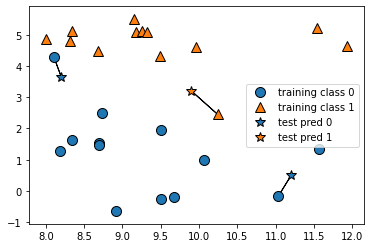

In [18]:
# Plot make_forge data with n_neighbors=1
mglearn.plots.plot_knn_classification(n_neighbors=1)

/home/paul-romeo/.local/lib/python3.8/site-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


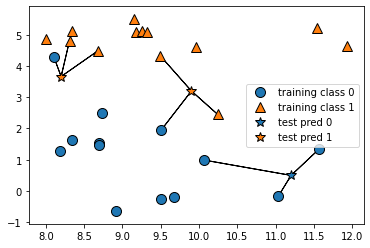

In [19]:
# Plot make_forge data with n_neighbors=1
mglearn.plots.plot_knn_classification(n_neighbors=3)

### Process: 
<ol>
<li>Store the make_forge data into X, and y 
<li>Split X, y data into X_train, X_test, y_train, y_test
<li>Initialize KNeighborsClassifier with n_neighbors=3
<li>Store X_train, y_train data 
<li>Make prediction using the predict method on X_test data 
<li>Evaluate the test set accuracy using the score method

In [20]:
# 1. Store the make_forge data into X and y 
X, y = mglearn.datasets.make_forge()

/home/paul-romeo/.local/lib/python3.8/site-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


In [21]:
# 2. Split X, y data into X_train, X_test, y_train, y_test 
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [22]:
# 3. Initialize KNeighborsClassifier with n_neighbors=3 
from sklearn.neighbors import KNeighborsClassifier 

clf = KNeighborsClassifier(n_neighbors=3)

In [23]:
# 4. Store X_train, y_train data
clf.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [24]:
# 5. Make prediction using the predict method on X_test data 
print("Test set prediction:{}".format(clf.predict(X_test)))

Test set prediction:[1 0 1 0 1 0 0]


In [25]:
# 6. Evaluate the test set accuracy using the score method 
print("Test set accuracy:{:.2f}".format(clf.score(X_test, y_test)))

Test set accuracy:0.86


## Analyze K-Nearest Neighbors Classifier 

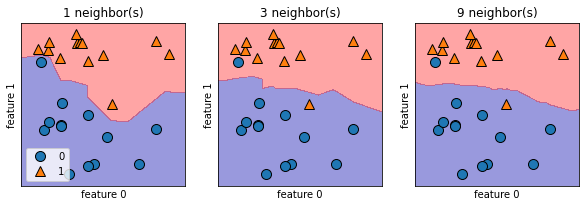

In [26]:

fig, axes = plt.subplots(1, 3, figsize=(10,3))

# Make 3 plots with neighbors of 1, 3, and 9 respectively 
for n_neighbors, ax in zip([1, 3, 9], axes):
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, ax=ax, alpha=.4)
    mglearn.discrete_scatter(X[:,0], X[:,1], y, ax=ax)
    ax.set_title("{} neighbor(s)".format(n_neighbors))
    ax.set_xlabel("feature 0")
    ax.set_ylabel("feature 1")
axes[0].legend(loc=3)


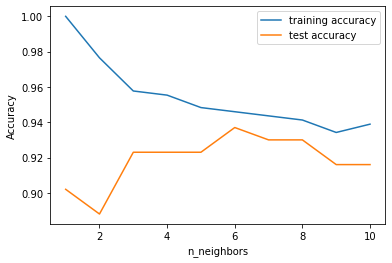

In [28]:
from sklearn.datasets import load_breast_cancer 

cancer = load_breast_cancer()
# X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=66)
    

# Initialize variables 
training_accuracy = []
test_accuracy = []

# Try n_neighbors from 1 to 11 
neighbor_settings  = range(1, 11)

for n_neighbors in neighbor_settings: 
    # Build the model 
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)

    # Record training set accuracy 
    training_accuracy.append(clf.score(X_train, y_train))

    # Record the generalization accuracy 
    test_accuracy.append(clf.score(X_test, y_test))

# Plotting... 
plt.plot(neighbor_settings, training_accuracy, label="training accuracy")
plt.plot(neighbor_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()


## K-Nearest Neighbors - Regression

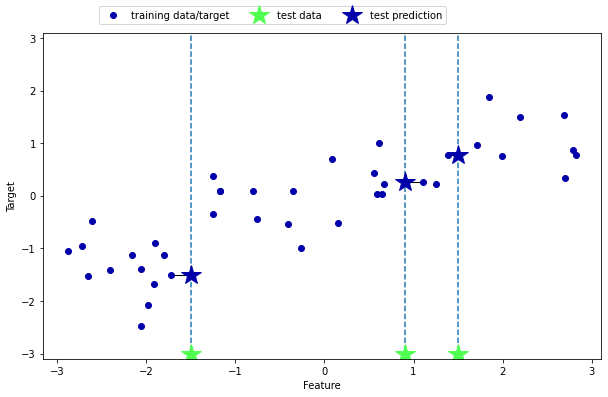

In [30]:
mglearn.plots.plot_knn_regression(n_neighbors=1)

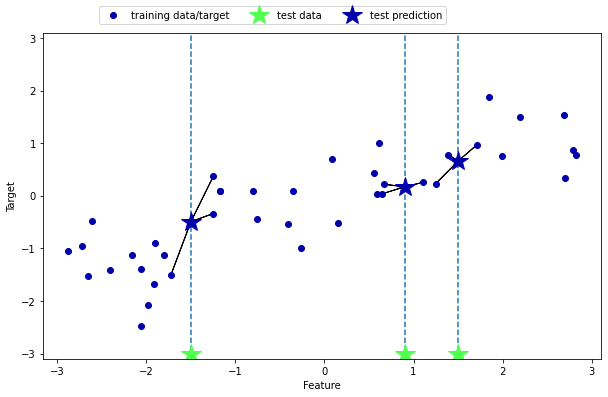

In [31]:
mglearn.plots.plot_knn_regression(n_neighbors=3)

In [34]:
from sklearn.neighbors import KNeighborsRegressor

# Assign make_wave dataset to X and y 
X,y = mglearn.datasets.make_wave(n_samples=40)

# Split the data into training data and test data 
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# Instantiate the model and set n_neighbors to 3 
reg = KNeighborsRegressor(n_neighbors=3)

# Fit the model using the training data and training target 
reg.fit(X_train, y_train)

# Make predictions on the test set 
print("Test set predictions:\n{}".format(reg.predict(X_test)))
print()

# R^2 score aka as the coefficient of determination, where 1=perfect prediction, 0=constant model to predict the mean of training set resp y_train 
print("Test set R^2: {:.2f}".format(reg.score(X_test, y_test)))

Test set predictions:
[-0.05396539  0.35686046  1.13671923 -1.89415682 -1.13881398 -1.63113382
  0.35686046  0.91241374 -0.44680446 -1.13881398]

Test set R^2: 0.83


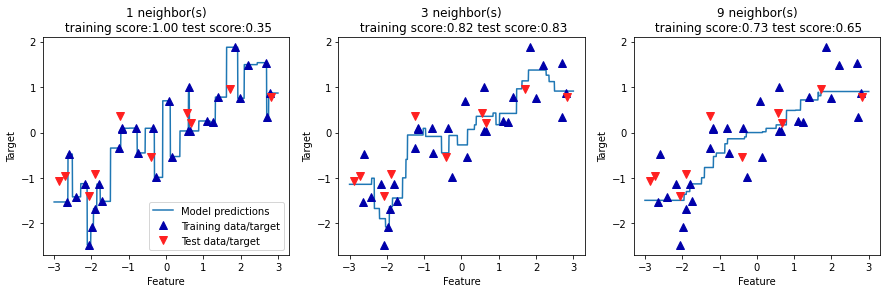

In [40]:
fig, axes = plt.subplots(1, 3, figsize=(15,4))

# Create 1000 data points, evenly spaced between -3 and 3 
line = np.linspace(-3, 3, 1000).reshape(-1,1)
for n_neighbors, ax in zip([1, 3, 9], axes):
    # Make prediction using 1, 3, and 9 neighbors 
    reg = KNeighborsRegressor(n_neighbors=n_neighbors)

    reg.fit(X_train, y_train)
    ax.plot(line, reg.predict(line))
    ax.plot(X_train, y_train, '^', c=mglearn.cm2(0), markersize=8)
    ax.plot(X_test, y_test, 'v', c=mglearn.cm2(1), markersize=8)
    ax.set_title("{} neighbor(s)\n training score:{:.2f} test score:{:.2f}".format(n_neighbors, reg.score(X_train, y_train), reg.score(X_test, y_test)))
    ax.set_xlabel("Feature")
    ax.set_ylabel("Target")

axes[0].legend(["Model predictions", "Training data/target", "Test data/target"], loc="best")
